In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Перетворення 2D зображень в 1D вектори
    layers.Dense(128, activation='relu'),  # Перший прихований шар
    layers.Dropout(0.2),  # Регуляризація Dropout
    layers.Dense(256, activation='relu'),  # Другий прихований шар
    layers.Dropout(0.2),  # Регуляризація Dropout
    layers.Dense(10, activation='softmax')  # Вихідний шар
])

In [5]:
# Компіляція моделі
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Навчання моделі
history1 = model1.fit(x_train, y_train, epochs=8,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/8
938/938 [==============================] - 6s 4ms/step - loss: 0.5531 - accuracy: 0.8029 - val_loss: 0.4167 - val_accuracy: 0.8513
Epoch 2/8
938/938 [==============================] - 3s 3ms/step - loss: 0.4075 - accuracy: 0.8508 - val_loss: 0.3959 - val_accuracy: 0.8600
Epoch 3/8
938/938 [==============================] - 7s 7ms/step - loss: 0.3730 - accuracy: 0.8640 - val_loss: 0.3786 - val_accuracy: 0.8619
Epoch 4/8
938/938 [==============================] - 6s 6ms/step - loss: 0.3494 - accuracy: 0.8728 - val_loss: 0.3729 - val_accuracy: 0.8650
Epoch 5/8
938/938 [==============================] - 4s 4ms/step - loss: 0.3348 - accuracy: 0.8759 - val_loss: 0.3537 - val_accuracy: 0.8684
Epoch 6/8
938/938 [==============================] - 3s 3ms/step - loss: 0.3240 - accuracy: 0.8812 - val_loss: 0.3403 - val_accuracy: 0.8736
Epoch 7/8
938/938 [==============================] - 3s 4ms/step - loss: 0.3160 - accuracy: 0.8817 - val_loss: 0.3375 - val_accuracy: 0.8767
Epoch 8/8
938

In [7]:
# Оцінка моделі
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.3315 - accuracy: 0.8791 - 1s/epoch - 3ms/step

Test accuracy: 0.8791


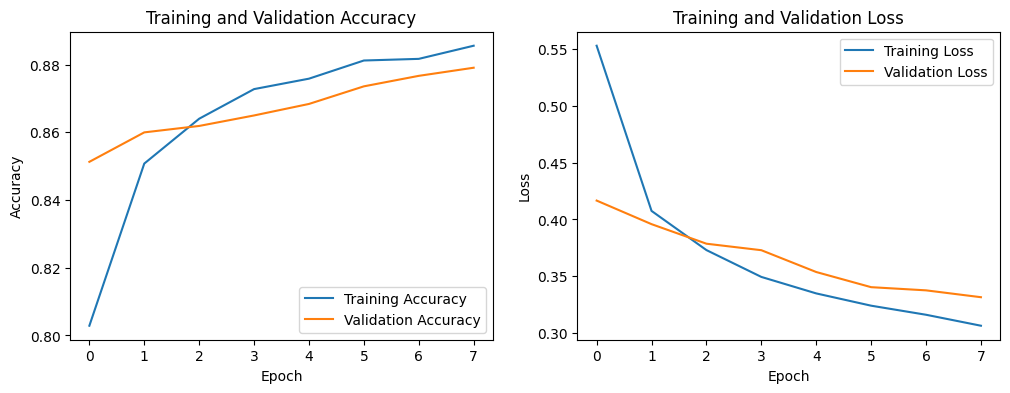

In [8]:
# Візуалізація результатів навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [9]:
# Побудова згорткової моделі
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Компіляція моделі
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Навчання моделі
history2 = model2.fit(x_train, y_train, epochs=8,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/8
938/938 [==============================] - 5s 6ms/step - loss: 0.1598 - accuracy: 0.9398 - val_loss: 0.2751 - val_accuracy: 0.9118
Epoch 2/8
938/938 [==============================] - 4s 4ms/step - loss: 0.1448 - accuracy: 0.9454 - val_loss: 0.2703 - val_accuracy: 0.9086
Epoch 3/8
938/938 [==============================] - 4s 4ms/step - loss: 0.1307 - accuracy: 0.9503 - val_loss: 0.2805 - val_accuracy: 0.9090
Epoch 4/8
938/938 [==============================] - 5s 5ms/step - loss: 0.1215 - accuracy: 0.9544 - val_loss: 0.2958 - val_accuracy: 0.9120
Epoch 5/8
938/938 [==============================] - 4s 4ms/step - loss: 0.1100 - accuracy: 0.9577 - val_loss: 0.2997 - val_accuracy: 0.9084
Epoch 6/8
938/938 [==============================] - 4s 5ms/step - loss: 0.1009 - accuracy: 0.9616 - val_loss: 0.3127 - val_accuracy: 0.9157
Epoch 7/8
938/938 [==============================] - 5s 5ms/step - loss: 0.0916 - accuracy: 0.9640 - val_loss: 0.3290 - val_accuracy: 0.9092
Epoch 8/8
938

In [21]:
# Оцінка моделі
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.3348 - accuracy: 0.9143 - 620ms/epoch - 2ms/step

Test accuracy: 0.9143


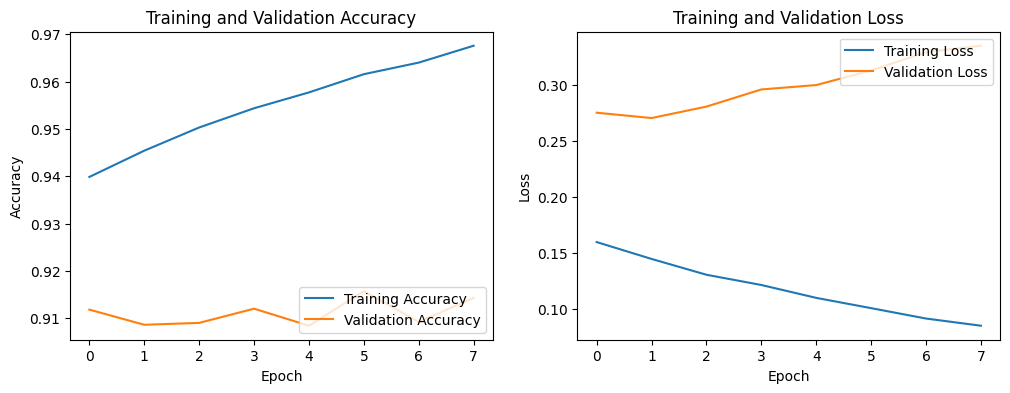

In [22]:
# Візуалізація результатів навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [23]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Створення вхідного тензора
input_tensor = Input(shape=(28, 28, 1))

# Зміна розміру зображень до 32x32
resized_input = tf.image.resize(input_tensor, [32, 32])

# Перетворення 1-канального зображення в 3-канальне
converted_input = tf.image.grayscale_to_rgb(resized_input)

In [16]:
# Завантаження базової моделі VGG16 з попередньо навченими вагами ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=converted_input)


58889256/58889256 [==============================] - 0s 0us/step


In [17]:
# Замороження шарів базової моделі
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# Створення нової моделі з базовою моделлю VGG16
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(
    x_train, y_train,
    steps_per_epoch=100,
    epochs=100,
    validation_data=(x_test, y_test),
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 15s 87ms/step - loss: 1.2040 - accuracy: 0.5860 - val_loss: 0.6120 - val_accuracy: 0.7845
Epoch 2/100
100/100 [==============================] - 7s 68ms/step - loss: 0.6189 - accuracy: 0.7794 - val_loss: 0.5019 - val_accuracy: 0.8193
Epoch 3/100
100/100 [==============================] - 7s 69ms/step - loss: 0.5328 - accuracy: 0.8096 - val_loss: 0.4541 - val_accuracy: 0.8356
Epoch 4/100
100/100 [==============================] - 7s 69ms/step - loss: 0.4844 - accuracy: 0.8266 - val_loss: 0.4322 - val_accuracy: 0.8420
Epoch 5/100
100/100 [==============================] - 7s 70ms/step - loss: 0.4576 - accuracy: 0.8347 - val_loss: 0.4136 - val_accuracy: 0.8469
Epoch 6/100
100/100 [==============================] - 7s 67ms/step - loss: 0.4390 - accuracy: 0.8412 - val_loss: 0.4071 - val_accuracy: 0.8504
Epoch 7/100
100/100 [==============================] - 7s 69ms/step - loss: 0.4242 - accuracy: 0.8462 - val_loss: 0.3991 - val_accuracy

In [26]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 5s - loss: 0.3781 - accuracy: 0.8757 - 5s/epoch - 16ms/step

Test accuracy: 0.8757


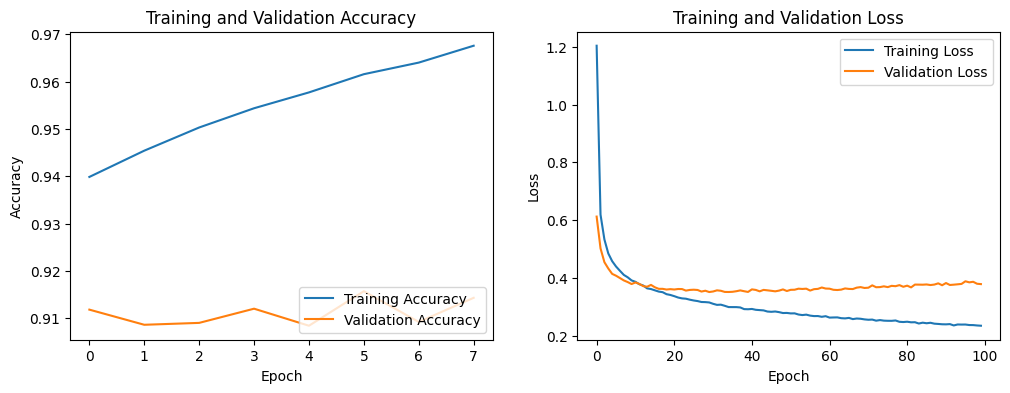

In [27]:
# Візуалізація результатів навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Можна зробити висновки що при використанні згорткової моделі навчання проходить краще про що свідчить показник точності, при використанні vgg16 для даного датасету покращень майже не відбувається, можливо через те що наш датасет чорно-білий а vgg16 навчений на кольорових даних.